# 2017's Advertising campaigns for video games

The online store Ice, which sells video games all over the world wants to forecast the most profitable games of 2017. This report will allow us to spot potential big winners and plan advertising campaigns.
The data is going back to 2016 and we’re planning a campaign for 2017.

The dataset contains The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature. The user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.

**Project Steps** <a class="anchor" id="table_of_contents"></a>  
[Data file and general info](#chapter1)  
[Data Preprocessing](#chapter2)  
[Analyzing the data](#chapter3)  
[User profile](#chapter4)  
[Testing hypothesis](#chapter5)    
[Overall conclusion](#chapter6)  

Data description:
- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)   
  **Data for 2016 may be incomplete.**

## 1. Data file and general info
<a class="anchor" id="chapter1"></a>

In [1]:
#import libraries of functions

#!pip install sidetable
#!pip install squarify
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import sidetable
import squarify
import scipy.stats as st
import matplotlib.ticker as mtick

#open the data file locally
try:
    df = pd.read_csv('games.csv')
    
#open the data file on the platform    
except:
    df = pd.read_csv('/datasets/games.csv')

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: sidetable in /home/jovyan/.local/lib/python3.7/site-packages (0.8.0)
Defaulting to user installation because normal site-packages is not writeable


In [2]:
#names of columns, types and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#show general info 
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


We can see that there are games with sales less than million, so they appear with 0.0 in the sales columns. There are missing values in the raiting and the two kind of scores, later we'll decide how to hendle them. The `Year_of_Release` should be changed to 'int' type. The scales of `Critic_Score` and `User_Score` are different, maybe it is better to make it as a percentage of the highest score possible. Let's see some statistical info about the data:

In [5]:
#show statistic summary for numeric values
df.describe(include = 'number')

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


We see that the first game was released in 1980 and most of the games were released after 2000. The highest sales are in the North American market. The lowest critic's score is 13 and the highest is 98. Now let's check the categorical values:

In [6]:
#show statistic summary for categorical values
df.describe(include = 'object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


**Conclusions from first impressions of the data**

- We have missing values in the scores and raiting, so we need to decide how to hendle them.
- The biggest market is North America, followed by Europe, Japan and the other countries.
- The `Critic_Score` and `User_Score` are pretty much the same for each game but in different scales.
- We need to change the type of `Year_of_Release` to 'int'
- The `User_Score` type is 'object' because of the records 'tbd', we need to change it to other numeric identifier.
- The column names contains upper case words so it is better to convert them all to lower case.
- The `User_Score` appears as 'object' type because of the records 'tbd', but it should be 'float' type. We have 2,424 such records, later we will decide how to hendle them. We have 8 unique values in the Rating of the ESRB, the most common is 'E' which means 'everyone'. There are 12 genres, 31 platform where PS2	is the most mentioned and there are 11559 different games.

## 2. Data Preprocessing
<a class="anchor" id="chapter2"></a>

First of all we'll creat a copy of the original data and convert all the column name to lower case

In [7]:
#creat a copy of the data so it could be manipulated without affecting the original data
df_original = df.copy(deep=True)

In [8]:
#convert to lower case
df.columns = df.columns.str.lower()
#check if changed
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Now we'll see how many missing values we have and decide how to handle them.

In [9]:
#show how many missing values in each column
df.stb.missing(style = True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


The `critic_score` and the `user_score` are missing in about half of the data. We think it will be better to leave them unchanged as for most parts of the research these columns are not relevant. In the places that we would like to see the affect we will use only rows that has all the information needed. Probably we have some problems with the data sources so it will be better to update the data engineers. As we mentioned before, we have some 'tbd' values in the `user_score` column. It is reasonable that new games that were released in the last year won't have scores yet, let's check if those records are from the last year.

In [10]:
#check in which years the 'user_score' is 'tbd'
df[df.user_score == 'tbd']['year_of_release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

Maybe there were too few votes and that's why it was labeled as 'tbd'. For us 'tbd' doesn't give much information so we can replace it with NaN values. As we mentioned, this column should be of type float, so while converting it we will replace the strings 'tbd' with NaN.

In [11]:
#convert the type of the column to numeric (float)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
#check if there are rows with 'tbd'
len(df[df['user_score']=='tbd'])

0

The `rating` will be hard to fill as we don't know all the games and it will be hard to estimate the target audience. For the `year_of_release` missing values - we'll try to fill the years based on the game name and the rest of the platforms that have this information. There are also names that contain the year so we'll use it. The rest of the rows with the year missing values will be removed. The `genre` and `name` are missing only 2 values, probably in the same rows, if so, we'll remove them too because we can't fill them.

In [12]:
#check the rows that missing both name and genre
df[df[['name','genre']].isna().all(axis = 1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


As we suspected, the values are missing both at the same time so we'll remove them.

In [13]:
#drop the lines in which name and genre are missing
df.drop(df[df['name'].isna() & df['genre'].isna()].index,inplace = True)
#check if cahnged
len(df[df[['name','genre']].isna().all(axis = 1)])

0

No more missing values in `genre` and `name`. Lets see the rows with missing values in the `year_of_release`.

In [14]:
df[df['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


We'll try to fill the games that appear on more than one platform and take the mean of the years for that game.

In [15]:
#fill the year of a game based on other platforms
df['year_of_release'].fillna(df.groupby('name')['year_of_release'].transform('mean'), inplace = True)

There are names that contain the year it was released (or close enough), so we will fill those records by the name.

In [16]:
#fill the year of a game based on years that appears in it's name
def fill_year(row):
    name = row['name']
    for word in name.split():
        if word.isdigit() and int(word) > 1980:
            return int(word)

df['year_of_release'].fillna(df[df['year_of_release'].isna()].apply(fill_year, axis = 1), inplace = True)

Now we'll remove the rest of the rows with the missing values.

In [17]:
#remove rows with missing values in 'year_of_release'
df.drop(df[df['year_of_release'].isna()].index, inplace = True)

In [18]:
#show how many missing values in each column
df.stb.missing(style = True)

,missing,total,percent
user_score,"9,031","16,574",54.49%
critic_score,"8,495","16,574",51.25%
rating,"6,703","16,574",40.44%
name,0,"16,574",0.00%
platform,0,"16,574",0.00%
year_of_release,0,"16,574",0.00%
genre,0,"16,574",0.00%
na_sales,0,"16,574",0.00%
eu_sales,0,"16,574",0.00%
jp_sales,0,"16,574",0.00%


In [19]:
#change the type to int
df['year_of_release'] = df['year_of_release'].astype('int')
#check if changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16574 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     8079 non-null   float64
 9   user_score       7543 non-null   float64
 10  rating           9871 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Now we'll calculate the total sales for each game.

In [20]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## 3. Analyzing the data
<a class="anchor" id="chapter3"></a>

First we want to know how many games were released in different years. We'll creat a subset, gropued by year and count the amount of games released on each year.

In [21]:
#creat a subset
grouped_by_year = df.groupby('year_of_release')['name'].count().reset_index().sort_values(by='year_of_release')
grouped_by_year.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


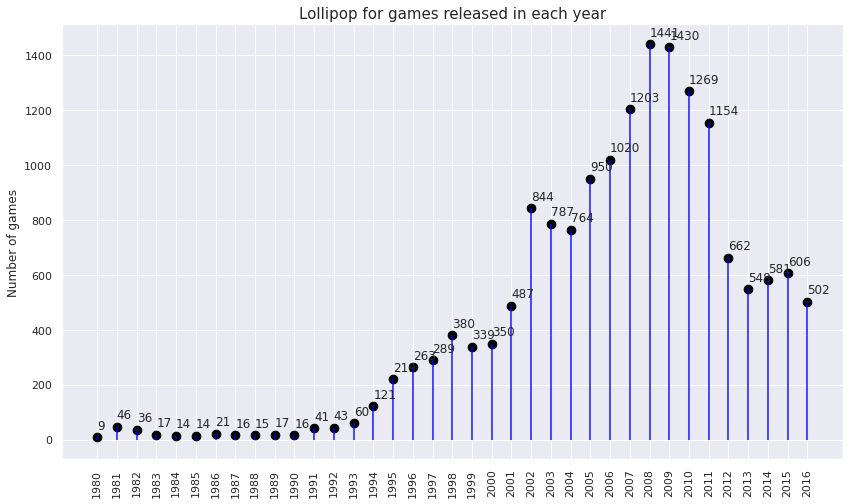

In [22]:
#plot the data
sns.set()
fig,ax=plt.subplots(figsize=(14,8))
#draw lines
ax.vlines(x=grouped_by_year.year_of_release, ymin = 0, ymax = grouped_by_year.name, color = 'blue', alpha = 0.7, linewidth = 2)
#draw circles
ax.scatter(x=grouped_by_year.year_of_release,y=grouped_by_year.name, s = 75, color = 'black')

ax.set_title('Lollipop for games released in each year', fontdict={'size':15});
ax.set_ylabel('Number of games');
#add ticks for each year and label them
ax.set_xticks(grouped_by_year.year_of_release);
ax.set_xticklabels(grouped_by_year.year_of_release, rotation = 90);

#add the exact amount on each point
for row in grouped_by_year.itertuples():
    ax.text(row.year_of_release, row.name + 30, s = round(row.name))

As we can see, most of the games were released after 2001, there was a huge jump in productions.
Now we want to see what are the most profitable platforms over the years.

In [23]:
#the total sales over years in each platform 
group1=df.groupby(['platform'])[['platform','total_sales']].sum().sort_values('total_sales').reset_index()
display(group1.head(), group1.tail())

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42


,platform,total_sales
26,DS,804.28
27,Wii,903.31
28,PS3,935.19
29,X360,966.67
30,PS2,1250.92


Now we'll use the z-score to define what platforms considered as above the avarage in terms of total sales.

In [24]:
#creat a z-score based on the total sales
group1['z_score'] = (group1['total_sales']-group1['total_sales'].mean())/group1['total_sales'].std()
#assign the red color for below the average and green for above
group1['colors'] = ['red' if x < 0 else 'green' for x in group1['z_score']]

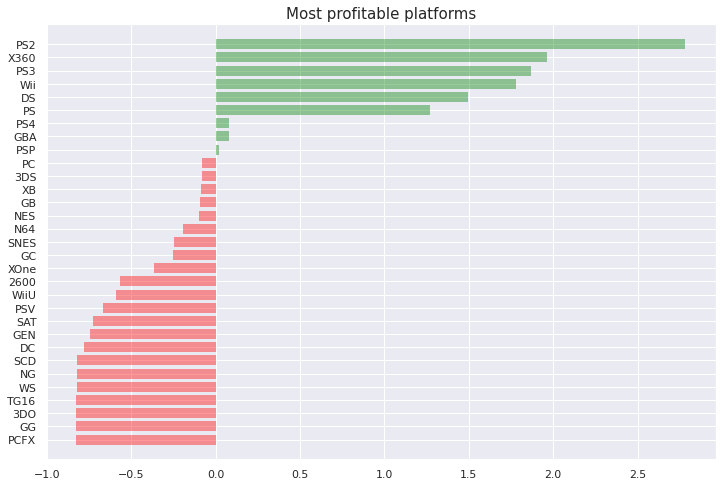

In [25]:
#plot the desired info
plt.figure(figsize=(12,8))
plt.hlines(y = group1.platform, xmin = 0, xmax= group1.z_score, color = group1.colors, alpha = 0.4, linewidth = 10);
plt.title('Most profitable platforms', fontdict={'size':15});

Now we will check the total sales per year for each one of the top 6 platforms that has the greatest total sales.

In [26]:
top6 = group1['platform'].tail(6)
group2=df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
group2 = group2.query('platform in @top6')
#show the first two years for each top platform
display(group2.groupby('platform').head(2))

,platform,year_of_release,total_sales
28,DS,1985,0.02
29,DS,2004,17.27
124,PS,1994,6.03
125,PS,1995,35.96
134,PS2,2000,39.17
135,PS2,2001,166.43
146,PS3,2001,0.48
147,PS3,2005,0.19
203,Wii,2006,140.19
204,Wii,2007,153.41


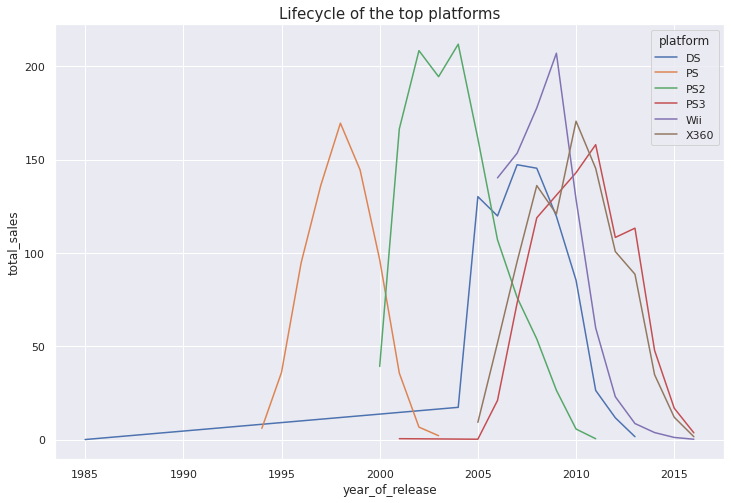

In [27]:
#plot the info
plt.figure(figsize=(12,8))
sns.lineplot(data = group2, x='year_of_release', y='total_sales', hue = 'platform')
plt.title('Lifecycle of the top platforms',fontdict={'size':15});

It seems that a lifspan of a platform is about 10 years and usually it grows pretty fast. About every 5 years there is a new platform, but in recent years, probably due to the development of technological capabilities, the frequency of rise of a new platform has increased. We will consider in our research games from 2013 onwards because we want to assure that the data we have is for platforms that are still in the game and not about to disappear. We have here few outliers as we know that the DS platform was released in 2004 and the PS3 in 2006, might be according to a typo.

In [28]:
df_filtered = df.query('year_of_release >= 2013')
len(df_filtered)

2237

The next question we want to answer is which platforms are leading in sales in the last few years?

In [29]:
#sum the total sales in the last years for each platform
group3 = df_filtered.groupby('platform')[['platform','total_sales']].sum().sort_values('total_sales').reset_index()
group3

,platform,total_sales
0,DS,1.54
1,PSP,3.74
2,Wii,13.66
3,PSV,32.99
4,PC,40.06
5,WiiU,64.63
6,X360,136.80
7,3DS,143.25
8,XOne,159.32
9,PS3,181.43


In [30]:
#organizing the data for squarify
sizes = group3.total_sales.values.tolist()
labels = group3.apply(lambda x: str(x[0]) +"\n$" + str(round(x[1])), axis = 1)

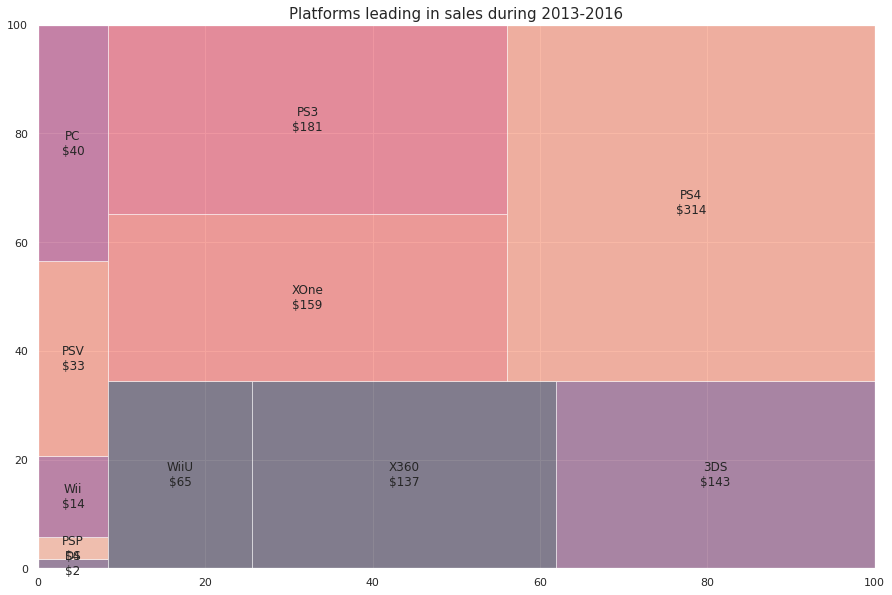

In [31]:
#plot the desired info
plt.figure(figsize = (15,10))
squarify.plot(sizes = sizes, label = labels, alpha =0.5);
plt.title('Platforms leading in sales during 2013-2016',fontdict={'size':15});

We can see that PS4 is leading, followed by PS3, XOne, 3DS, X360 and WiiU. So now we want to determine the trend of each platform. Which ones are growing or shrinking? We will make few visualizations that will help us with selecting the potentially profitable platforms.

In [32]:
#sum of the total sales for each platform in each year
group4 = df_filtered.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

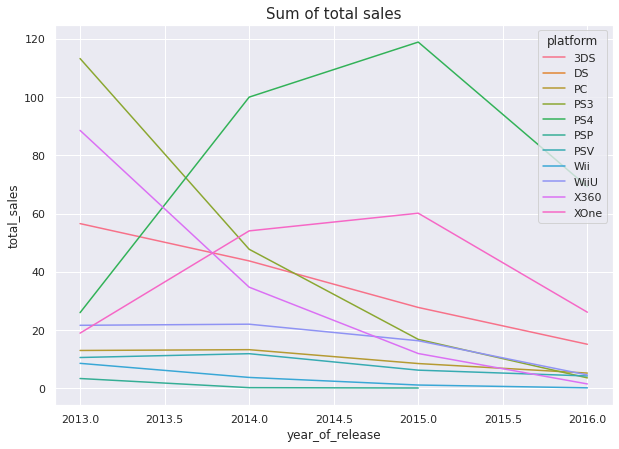

In [33]:
plt.figure(figsize=(10,7))
sns.lineplot(data = group4, x='year_of_release', y='total_sales', hue = 'platform')
plt.title('Sum of total sales',fontdict={'size':15});

In [34]:
#another way to show the data by pivot table
group5 = pd.pivot_table(
    df_filtered,index= 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum', fill_value = 0)
group5

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,13.01,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


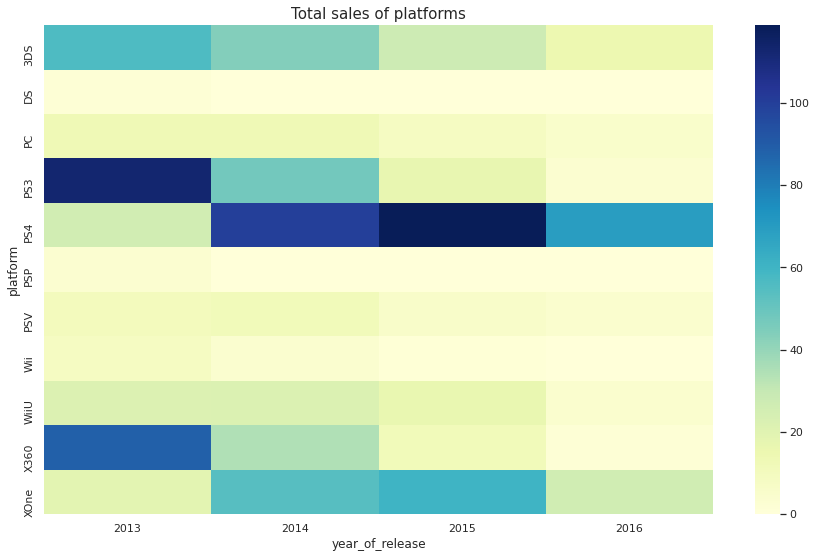

In [35]:
plt.figure(figsize = (15,9))
sns.heatmap(group5.T,cmap = 'YlGnBu');
plt.title('Total sales of platforms',fontdict={'size':15});

In [36]:
#calculate the difference between the total sales of the previous year
dynamics = group5 - group5.shift(+1)
dynamics

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,-12.81,-1.54,0.27,-65.49,74.01,-3.14,1.31,-4.84,0.38,-53.84,35.11
2015,-15.98,0.00,-4.76,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016,-12.64,0.00,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


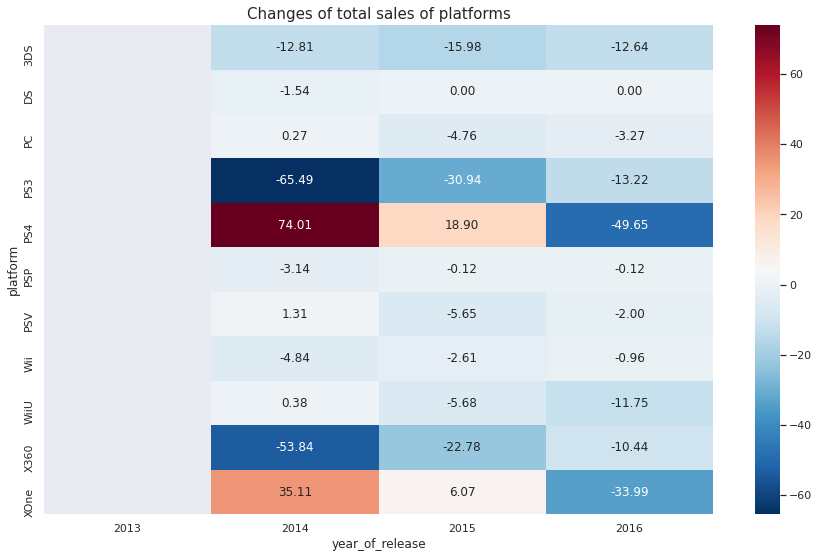

In [37]:
plt.figure(figsize = (15,9))
sns.heatmap(dynamics.T,cmap = 'RdBu_r',annot=True, fmt=".2f");
plt.title('Changes of total sales of platforms',fontdict={'size':15});

We can inferr from the graphs that the platform that are still "alive" are 3DS, PS4 and XOne where PS4 is the most profitable, followed by XOne and 3DS. Also the PC platform is still in the game together with WiiU and PSV but their revenue was always pretty low. We see that PS3 and X360 were pretty high in revenue but till today they already about to fade away. We have some flactuations of the total sales of PS4 and XOne but they are in their first years so we assume it is part of the growing path. From all we mentioend above, we choose the PS4, XOne, 3DS, PC, WiiU and PSV as the potentially profitable platforms.
Now we want to see the distribution of the global sales and the mean sales of the platforms.

In [38]:
#our chosen platforms
potentially_profitable = ['PS4','XOne','3DS','PC','WiiU','PSV']
#filter the data for the relevant platforms
df_filtered = df_filtered.query('platform in @potentially_profitable')

In [39]:
#global sales of all games of each platform in each year
grouped1=df_filtered.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
ordered1=grouped1.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

#average sales of a game for each platform in each year
grouped2=df_filtered.groupby(['platform','year_of_release'])['total_sales'].mean().reset_index()
ordered2=grouped2.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

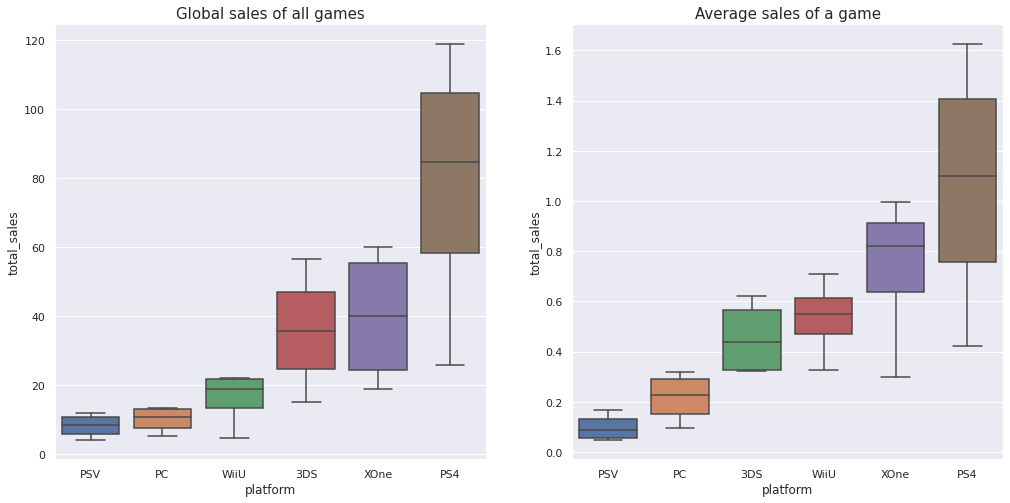

In [40]:
#plot the desired data
fig, axes = plt.subplots(1,2,figsize=(17, 8))
sns.boxplot(x='platform',y='total_sales',data=grouped1,order=ordered1, ax=axes[0])
sns.boxplot(x='platform',y='total_sales',data=grouped2,order=ordered2, ax=axes[1]);
axes[0].set_title('Global sales of all games',fontdict={'size':15})
axes[1].set_title('Average sales of a game',fontdict={'size':15});

We can see here that PS4 is the most profitable platform in terms of total and mean sales. Also the XOne has high total and mean sales. The less profitable platforms in total and for mean are PSV and PC.
Now we want to see the affect of the critic and users score on the total sales. First we'll see the correlations for PS4.

In [41]:
#take only rows that has no missing values
group6 = df_filtered[df_filtered.notna().all(axis=1)]
group6 = pd.pivot_table(group6,index= ['platform','name'], values = ['critic_score','user_score','total_sales']).reset_index()

In [42]:
#save the data of platform PS4
PS4 = group6.query('platform == "PS4"')

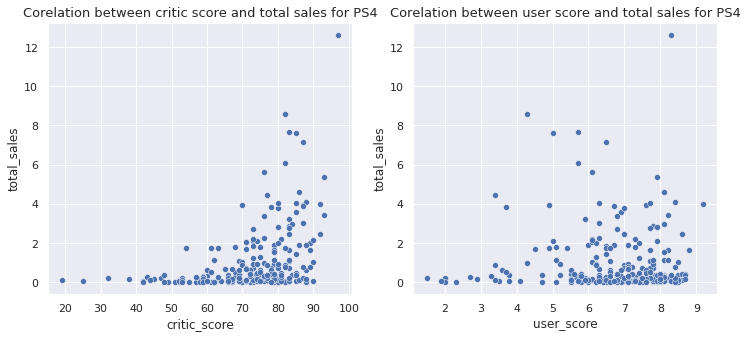

In [43]:
fig, axes = plt.subplots(1,2,figsize=(12, 5))
sns.scatterplot(x='critic_score',y='total_sales',data=PS4, ax=axes[0])
sns.scatterplot(x='user_score',y='total_sales',data=PS4, ax=axes[1]);
axes[0].set_title('Corelation between critic score and total sales for PS4',fontdict={'size':13})
axes[1].set_title('Corelation between user score and total sales for PS4',fontdict={'size':13});

In [44]:
#calculate the correlation between reviews and sales
group6.corr()

,critic_score,total_sales,user_score
critic_score,1.000000,0.323337,0.486243
total_sales,0.323337,1.000000,0.006050
user_score,0.486243,0.006050,1.000000


There is a noticeable positive corelation between critic score and total sales, while the user score has a very weak positive correlation. It makes sense because the critics usually get access before the game goes on sale and their opinion is an influential factor on consumers purchasing the games. Usually the user's rating is done already after the purchase so it makes sense that it will not affect sales. We want to see if these correlations also exist for other platforms.

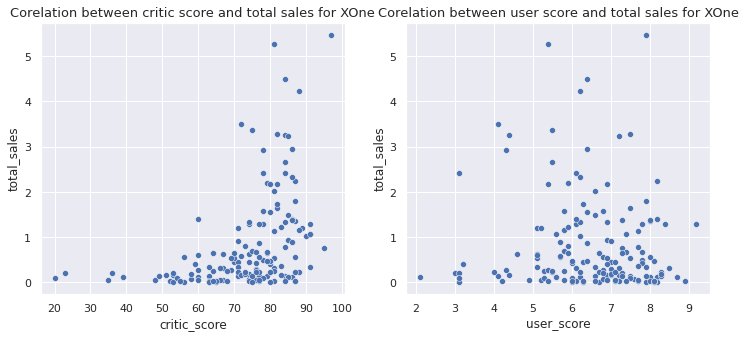

None

,critic_score,total_sales,user_score
critic_score,1.000000,0.409930,0.491255
total_sales,0.409930,1.000000,-0.075916
user_score,0.491255,-0.075916,1.000000


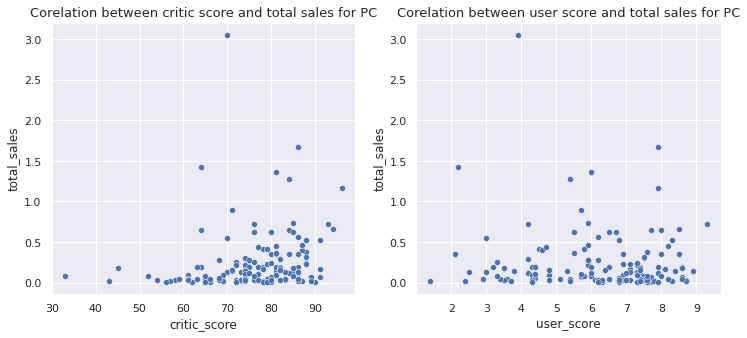

None

,critic_score,total_sales,user_score
critic_score,1.000000,0.181365,0.476534
total_sales,0.181365,1.000000,-0.081140
user_score,0.476534,-0.081140,1.000000


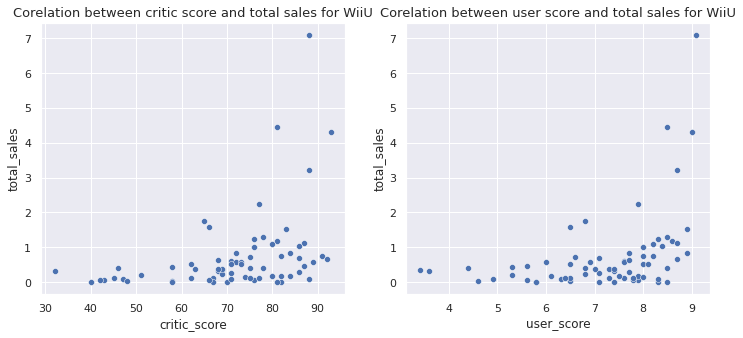

None

,critic_score,total_sales,user_score
critic_score,1.000000,0.379504,0.721313
total_sales,0.379504,1.000000,0.408692
user_score,0.721313,0.408692,1.000000


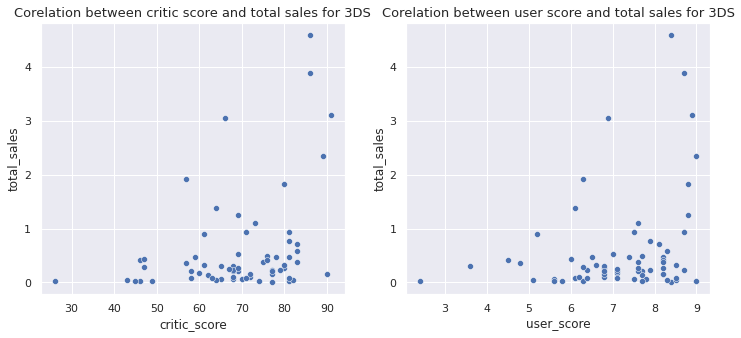

None

,critic_score,total_sales,user_score
critic_score,1.000000,0.339235,0.769536
total_sales,0.339235,1.000000,0.272990
user_score,0.769536,0.272990,1.000000


In [45]:
#function for graphing and calculating the correlations
def multi_scatter(df):
    platforms = ['XOne','PC','WiiU','3DS']
    for i in platforms:
        info = df.query('platform == @i')
        fig, axes = plt.subplots(1,2,figsize=(12, 5))
        sns.scatterplot(x='critic_score',y='total_sales',data=info, ax=axes[0])
        sns.scatterplot(x='user_score',y='total_sales',data=info, ax=axes[1]);
        axes[0].set_title('Corelation between critic score and total sales for ' + i,fontdict={'size':13})
        axes[1].set_title('Corelation between user score and total sales for ' + i,fontdict={'size':13});
        display(plt.show(), info.corr())
        
multi_scatter(group6)

For XOne, PC and 3DS the critic score also has a positive correlation with the total sales while the users score for XOne and PC have a negative correlation which could be explained by the fact that there can be sponsored reviews but in practice the product is less successful to the consumers' opinion.
For WiiU wee see the opposite, the users score has a lareger positive correlation with the total sales than the critic score.

We want to see if games have different sales for different platforms. We will select games that appear on three selected platforms and make a comparison in their sales.

In [46]:
multi_platform = df_filtered['name'].value_counts()
#save the games that has at least 3 different platforms
multi_platform = multi_platform[multi_platform > 2]

In [47]:
#list of the platforms we want to compare
platforms = ['XOne','PS4','3DS']
#save the games from before but only for the relevant platforms
group7 = df_filtered.query('name in @multi_platform.index and platform in @platforms')
group7 = pd.pivot_table(group7, index=['name','platform'], values = 'total_sales').reset_index()

In [48]:
#count for each game in how many platforms of the 3 it appears
valid_info = group7['name'].value_counts()
#save the names of those who appear in all 3
valid_info = valid_info[valid_info == 3]
#create a table that con
group7 = group7.query('name in @valid_info.index')

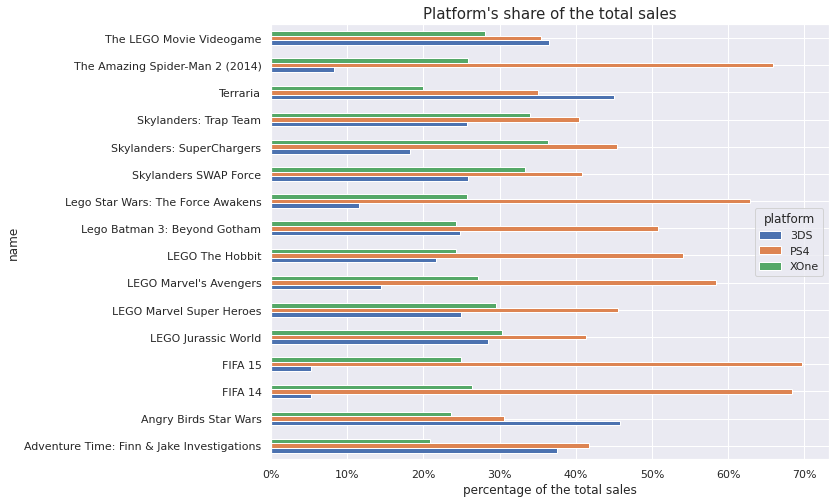

In [49]:
games_3_platform = pd.pivot_table(group7, index = 'name',columns = 'platform', values = 'total_sales')
percentages = games_3_platform.div(games_3_platform.sum(axis=1), axis =0)
ax=percentages.plot(kind = 'barh', figsize = (10,8))
plt.title("Platform's share of the total sales",fontdict={'size':15})
plt.xlabel('percentage of the total sales')
#changing xlables ticks to percentages
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

We can see that for the same games most of the time the PS4 platform is much more profitable than the others. Probably much more people use this platform. Also most of the time the XOne is more profitable than 3DS.  
Now we want to see the difference between genres.

In [50]:
#global sales of all games of each genre in each year
grouped3=df_filtered.groupby(['genre','year_of_release'])['total_sales'].sum().reset_index()
ordered3=grouped3.groupby(['genre'])['total_sales'].sum().sort_values().reset_index()['genre']

#average sales of a game for each genre in each year
grouped4=df_filtered.groupby(['genre','year_of_release'])['total_sales'].mean().reset_index()
ordered4=grouped4.groupby(['genre'])['total_sales'].sum().sort_values().reset_index()['genre']

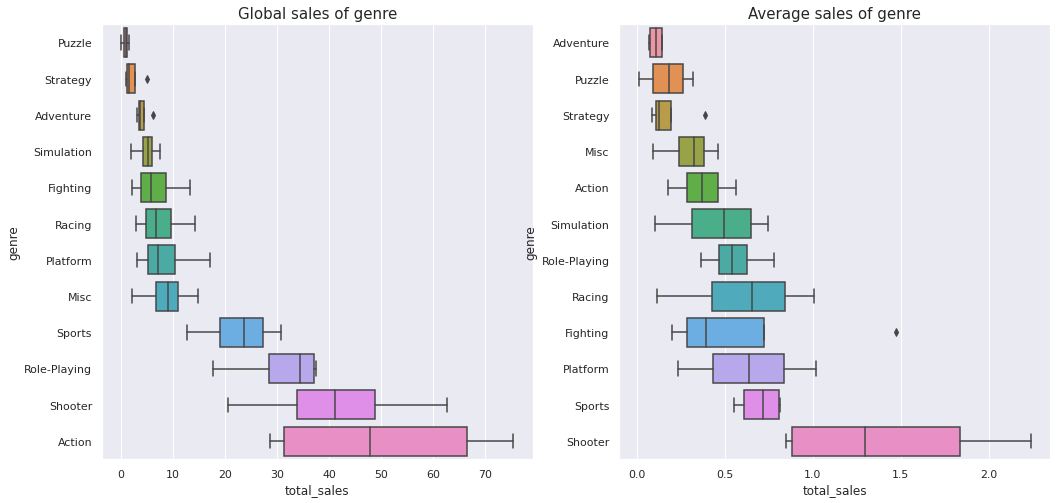

In [51]:
#plot the desired data
fig, axes = plt.subplots(1,2,figsize=(17, 8))
sns.boxplot(y='genre',x='total_sales', orient = "h", data=grouped3,order=ordered3, ax=axes[0])
sns.boxplot(y='genre',x='total_sales', orient = "h", data=grouped4,order=ordered4, ax=axes[1]);
axes[0].set_title('Global sales of genre',fontdict={'size':15})
axes[1].set_title('Average sales of genre',fontdict={'size':15});

We see that the highest global revnue is for 'Action' games but the 'Shooter', 'Sports' and 'Platform' are more profitable per game, probably there are a lot of 'Action' games and that's why the global revenue is high. We also can say that 'Adventure', 'Puzzle' and 'Stratagy' are the less profitable genres.

### Conclusions

- Most of the games were released after 2001, there was a huge jump in production.
- The lifespan of a platform is about 10 years so we focus in our research on the last 4 years at max so we'll have relevant data. 
- PS4 is leading in terms of global total sales, followed by PS3, XOne, 3DS, X360 and WiiU
- The platform that are still "alive" are WiiU, PC, PSV, 3DS, PS4 and XOne where PS4 is the most profitable, followed by XOne and 3DS. WiiU, PC and PSV revenues are exist but they are pretty low.
- PS4 and XOne are the most profitable platforms in terms of total and mean sales. The most profitable games of 2017 probably will be of PS4 and XOne.
- Critic score has a positive correlation with the total sales.
- For games that are distributed for several platforms, the most profitable platform is PS4 followed by XOne and 3DS.
- The most profitable genres (mean profit per game) are 'Shooter','Sports' and 'Platform' while the 'Adventure', 'Puzzle' and 'Stratagy' are the less profitable genres.
- The most profitable genre in terms of global sales is 'Action', probably there are a lot of 'Action' games.

## 4. User profile for each region
<a class="anchor" id="chapter4"></a>

We wnat to define for each region (NA, EU, JP):
- The top five platforms and their market shares in each region.
- The top five genres.
- Do ESRB ratings affect sales in individual regions?

In [52]:
na = df_filtered.drop(['eu_sales', 'jp_sales','other_sales'], axis=1)
eu = df_filtered.drop(['na_sales', 'jp_sales','other_sales'], axis=1)
jp = df_filtered.drop(['eu_sales', 'na_sales','other_sales'], axis=1)

In [53]:
#the top 5 platforms in the NA market
(na.groupby('platform')['na_sales'].sum().nlargest(5)/df_filtered['na_sales'].sum())*100

platform
PS4     38.087566
XOne    32.616462
3DS     13.380035
WiiU    10.231173
PC       3.919440
Name: na_sales, dtype: float64

In [54]:
#the top 5 platforms in the EU market
(eu.groupby('platform')['eu_sales'].sum().nlargest(5)/df_filtered['eu_sales'].sum())*100

platform
PS4     51.225357
XOne    18.730712
3DS     11.240606
PC       9.381694
WiiU     7.206913
Name: eu_sales, dtype: float64

In [55]:
#the top 5 platforms in the JP market
(jp.groupby('platform')['jp_sales'].sum().nlargest(5)/df_filtered['jp_sales'].sum())*100

platform
3DS     59.702412
PSV     16.367318
PS4     14.051770
WiiU     9.579151
XOne     0.299348
Name: jp_sales, dtype: float64

For NA mraket PS4 is responsible for **more than third** of total profits in this market. XOne is responsible for almost third of the profits and PC has the smallest share out of these top 5.
For EU market PS4 is significantly leading in profits and responsible for **more than half** of the profits in this market. Also here we have the same platforms as in NA but with a little bit different shares. Here the smallest of the top 5 is WiiU.
The JP market has some significant differences:
The leading platform is 3DS and is responsible for **more than half** of the profits! PSV is above PS4 and XOne is the smallest of the top 5.  
Now we'll check the top 5 genres.

In [56]:
#the top 5 genres in the NA market
(na.groupby('genre')['na_sales'].sum().nlargest(5)/df_filtered['na_sales'].sum())*100

genre
Shooter         26.399299
Action          25.747811
Role-Playing    13.281961
Sports          12.991243
Platform         4.966725
Name: na_sales, dtype: float64

In [57]:
#the top 5 genres in the EU market
(eu.groupby('genre')['eu_sales'].sum().nlargest(5)/df_filtered['eu_sales'].sum())*100

genre
Action          27.026831
Shooter         23.559525
Sports          14.025342
Role-Playing    11.618197
Racing           5.511382
Name: eu_sales, dtype: float64

In [58]:
#the top 5 genres in the JP market
(jp.groupby('genre')['jp_sales'].sum().nlargest(5)/df_filtered['jp_sales'].sum())*100

genre
Role-Playing    39.478781
Action          26.298644
Misc             7.281211
Fighting         4.692728
Platform         4.182074
Name: jp_sales, dtype: float64

There is almost the same shares in the NA and EU market in terms of profit by genre. The leading genre in profits are 'Action',  'Shooter', 'Sports' and 'Role playing'. In the JP market the biggest shares are of 'Role playing' and 'Action' while the 'Shooter' is out of the top 5.  
Now we want to see what is the correlation between the ESRB raiting and the sales in each region.

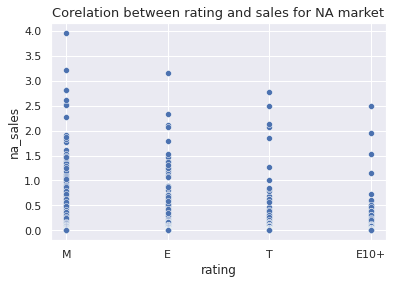

None

0.17389966933492462

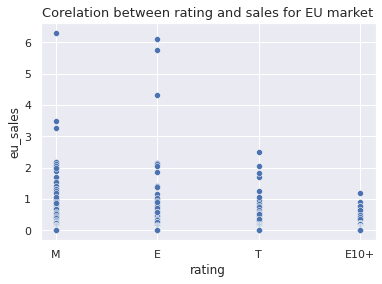

None

0.1710559311103628

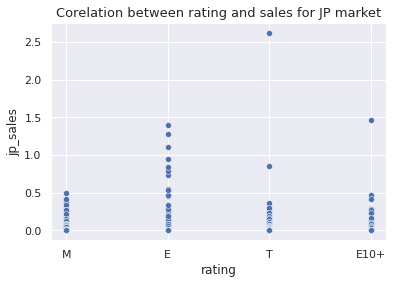

None

-0.007722230718076868

In [59]:
regions = {"na" : na, 'eu': eu, 'jp': jp}
#loop over the list, plot and calculate the correlations
for k,v in regions.items():
    column = k+"_sales"
    sns.scatterplot(x='rating',y=column,data=v )
    plt.title('Corelation between rating and sales for ' +k.upper() +' market',fontdict={'size':13})
    #make a numeric categorization for estimating the correlation
    v['categorized'] = v['rating'].replace(['M', 'E', 'T', 'E10+'], [4, 3, 2, 1])
    
    display(plt.show(), v['categorized'].corr(v[column]))

There is some positive correlation between the rating and the sales for NA and EU market, the highest in sales are probably of the 'M' (mature,17+) and 'E' (everyone). For the JP market it doesn't seem to have the same effect.

### Conclusion

- The top platforms in NA and EU are the same but have different shares. In both the PS4 and XOne are the biggest and PSV and is the smallest. The share of the XOne is bigger in NA than in EU.
- The top platform in JP is 3DS and XOne and PC are the smallest.
- The most popular genre are almost the same in the NA and EU and has pretty similar shares. The most dominant are 'Action', 'Shooters','Sports' and 'Role Playing' while in JP the majority is 'Role Playing' and 'Action' and 'Shooters' and 'Sports' are not in the top 5.
- The most profitable ratings are 'M' and 'E' for NA and EU markets.

## 5. Testing hypotheses
<a class="anchor" id="chapter5"></a>

We want to test two hypothesis:
- The average user ratings of the XOne and PC platforms are the same
- The average user ratings for the Action and Sports genres are different.

For the first hypothesis we'll define the null hypothesis and the alternative hepothesis as follow:
- $H_0$ : $\mu$(`user_score` of XOne) = $\mu$(`user_score` of PC)  
- $H_a$ : $\mu$(`user_score` of XOne) != $\mu$(`user_score` of PC)  

First we will check if our distribution is normal with Shapiro-Wilk test for normality and than we'll decide which test to choose. The hypothesis for the Shapiro-Wilk are as follow:
- $H_0$ : the data has a normal distribution
- $H_a$ : the data doesn't have a normal distribution

For all the tests we'll define the critical statistical significance level as 0.05

In [60]:
user_XOne = df_filtered.query('platform == "XOne"')['user_score'].notna()
user_PC = df_filtered.query('platform == "PC"')['user_score'].notna()

In [61]:
#check if the distribution is normal
display(st.shapiro(user_XOne), st.shapiro(user_PC))

ShapiroResult(statistic=0.5491431355476379, pvalue=8.461930478373724e-25)

ShapiroResult(statistic=0.4626051187515259, pvalue=8.868836568985074e-24)

The p-value is much less than 0.05 which means that the assumption of **normality *was* rejected**, so we will choose the Mann-Whitney U test that doesn't require a normal distribution.

In [62]:
alpha = 0.05 # critical statistical significance level
#check if the means of the groups are equal
results = st.mannwhitneyu(user_XOne, user_PC)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.03254080130900971
We reject the null hypothesis


The null hypothesis was rejected, therefore, we can conclude that the average user score of XOne games differs from average user score of PC games.

Now we will test the second hypothesis. For the second hypothesis we'll define the null hypothesis and the alternative hepothesis as follow:
- $H_0$ : $\mu$(`user_score` of Action) = $\mu$(`user_score` of Sports)  
- $H_a$ : $\mu$(`user_score` of Action) != $\mu$(`user_score` of Sports)

First we will check if our distribution is normal with Shapiro-Wilk test as we explained before.

In [63]:
user_action = df_filtered.query('genre == "Action"')['user_score'].notna()
user_sports = df_filtered.query('genre == "Sports"')['user_score'].notna()

In [64]:
#check if the distribution is normal
display(st.shapiro(user_action), st.shapiro(user_sports))

ShapiroResult(statistic=0.636524498462677, pvalue=5.1377956072763594e-33)

ShapiroResult(statistic=0.4947774410247803, pvalue=4.962054869431303e-19)

Also here the p-value is much less than 0.05 which means that the assumption of **normality *was* rejected**, so we will choose the Mann-Whitney U test that doesn't require a normal distribution.

In [65]:
alpha = 0.05 # critical statistical significance level
#check if the means of the groups are equal
results = st.mannwhitneyu(user_action, user_sports)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  2.4482079743329375e-09
We reject the null hypothesis


The null hypothesis was rejected, therefore, we can conclude that there is a difference between the average user score of 'Action' games and average user score of 'Sports' games.

## 6. General conclusion
<a class="anchor" id="chapter6"></a>

In this study, we analayzed the collected data about games such as user and expert reviews, genres, platforms and historical data on game sales. The aim of this research was to spot potential big winners and plan advertising campaigns.

The quality of the data was good enough for the sales but pretty poor for the reviews and the age rating. We should consider using more up to date resources for this information next time.

The start of the gaming industry was around 1980 and the big boom was at the beggining of 2000's. The biggest market is North America, followed by Europe, Japan and the other countries. We found that the lifespan of common platform is about 10 years and about every 3-5 years new platforms arise. So we chose to focus on the last 4 years (2013-2016) so we'll have relevant data for our predictions.   
In this time frame the leading platform in terms of sales was PS4 followed by PS3, XOne, 3DS, X360 and WiiU. We inferred from the graphs that the platform that are still "alive" are 3DS, PS4 and XOne where PS4 is the most profitable, followed by XOne and 3DS. Also the PC platform is still in the game together with WiiU and PSV but their revenue was always pretty low. We saw that PS3 and X360 were pretty high in revenue but till today they already about to fade away. From all we mentioend above, we choose the **PS4, XOne, 3DS, PC, WiiU and PSV as the potentially profitable platforms** and continued our study with only these platforms.

We found out that in terms of total and mean sales **PS4 is the most profitable platform together with XOne**, as they are both growing platforms. The **less profitable platforms in total and mean sales are PSV and PC**.  
We wanted to test whether reviews had an effect on sales and we found that there is a noticeable positive corelation between critic score and total sales, while the user score has a very weak positive correlation. It makes sense because the critics usually get access before the game goes on sale and their opinion is an influential factor on consumers purchasing the games. Usually the user's rating is done already after the purchase so it makes sense that it will not affect sales.

For games that are not platform-exclusive we wanted to see if there's a difference in sales between the platform. We made the comparison between PS4, XOne and 3DS and found that in general the **PS4 version has bigger sales than others, usually followed by XOne**.

Next we wanted to examine whether certain genres can be generalized as more profitable or less profitable. We saw that the highest global revnue is for 'Action' games but the **'Shooter', 'Sports' and 'Platform' are more profitable per game**, probably there are a lot of 'Action' games and that's why the global revenue is high. We also can say that **'Adventure', 'Puzzle' and 'Stratagy' are the less profitable genres**.

Then we wnated to define for each region the top five platforms, top five genres and test if ESRB ratings affect sales in individual regions. We found that for NA mraket **PS4 is responsible for *more than third* of total profits** in this market. **XOne is responsible for almost third of the profits**. For EU market **PS4 is significantly leading in profits and responsible for more than half of the profits** in this market. Also here we have the same platforms as in NA but with a little bit different shares. The JP market has some significant differences: The leading platform is **3DS and is responsible for more than half of the profits!** PSV is above PS4 and XOne is the smallest of the top 5.
For the genres we found that there is almost the same shares in the NA and EU market in terms of profit by genre. The **leading genre in profits are 'Action', 'Shooter', 'Sports' and 'Role playing'**. In the JP market the biggest shares are of 'Role playing' and 'Action' while the 'Shooter' is out of the top 5.
There is some positive correlation between the rating and the sales for NA and EU market, the highest in sales are probably of the 'M' (mature,17+) and 'E' (everyone). For the JP market it doesn't seem to have the same effect.

**From all that is mentioned above we recommend to focus the advertising efforts:**
- **NA and EU - games that are distributed on PS4 and XOne of the following genres: 'Shooter', 'Sports' and 'Platform' as they are the most profitable per game and found in the top 5. Preffered those who have 'M' and 'E' age ratings.**
- **JP - games that are distributed on 3DS and PS4 'Platform', 'Fighting' and 'Role-Playing' as they are the most profitable per game and found in the top 5. Preffered those who have 'E' age ratings.**